In [1]:
# --- 1. Bo'sh dataset papkalarini yaratish (Optimallashtirilgan) ---
import os

# Asosiy dataset papkasi
dataset_folder = "dataset"

# Bo'sh papkalarni yaratish
subfolders = ["images/train", "images/val", "labels/train", "labels/val"]

# 🔁 1-bosqich:   sub = "images/train"  🔁 2-bosqich:  sub = "images/val"  🔁 3-bosqich:  sub = "labels/train" 🔁 4-bosqich: sub = "labels/val"
# siklda:
# sub = 'images/train' va dataset_folder = 'dataset'
# demak: path = os.path.join('dataset','images/train')
# natija:  dataset/images/train
# Har bir siklda shunday biriktirib boradi:  dataset/images/train; dataset/images/val;  dataset/labels/train;  dataset/labels/val


# os.makedir():
# papka yaratdi
#agar papka allaqachon bor bolsa XATO BERMAYDI: exist_ok = True bolgani un:

for sub in subfolders:
    path = os.path.join(dataset_folder, sub)
    os.makedirs(path, exist_ok=True)
    # Comment: exist_ok=True yordamida papka mavjud bo'lsa xatolik bermaydi

print("✅ Bo'sh dataset papkalari yaratildi!")


✅ Bo'sh dataset papkalari yaratildi!


In [2]:
# --- 2. Rasm fayllarni train/val papkalarga ajratish (Optimallashtirilgan) ---
import os
import shutil        # shutil — fayllarni ko‘chirish yoki nusxalash uchun ishlatiladi.
from sklearn.model_selection import train_test_split   # rasm fayllarni avtomatik tarzda train/val ga bo‘lib berish  80% → train  20% → val

# Asosiy papkalar
images_folder = "rasm"  # Original rasm papkasi
dataset_images_folder = "dataset/images"  # YOLO dataset images papkasi



# Rasm fayllar ro'yxati (faqat .png)
# os.listdir(images_folder)--->  berilgan papkadagi barcha fayllar va papkalarni ro‘yxat shaklida beradi.
# images_folder papkasi bizda original rasmlar papkasi, misol: images_files = ['img1.png', 'img2.png', 'img3.png'] shunday royhat hosil qilishi mn
# natija faqat string korinishida boladi,
# if f.endswith(".png")----> faqat pmg fayllar royhatga oladi,

image_files = [f for f in os.listdir(images_folder) if f.endswith(".png")]




# Train / Val split (80/20)
# train_test_split(...)---: berilgan ro‘yxatni train va validation qismlarga tasodifiy ajratish.
train_files, val_files = train_test_split(image_files, train_size=0.8, random_state=42)


# Fayllarni nusxalash
#1️⃣ for f in train_files:
#train_files → train uchun ajratilgan rasm fayllari ro‘yxati.
#for f in train_files: → har bir faylni navbat bilan oladi.
# f — hozirgi fayl nomi (masalan "img1.png").

#os.path.join(images_folder, f) → manba fayl yo‘li (original rasm).  Misol: "rasm/img1.png"
# os.path.join(dataset_images_folder, "train", f) → manzil fayl yo‘li (train papkaga nusxa).
# Misol: "dataset/images/train/img1.png"
# shutil.copy(source, destination) → faylni manbadan manzilga nusxalaydi.
# sodda tilda: “train faylini train papkaga nusxalaymiz”.
for f in train_files:
    shutil.copy(os.path.join(images_folder, f), os.path.join(dataset_images_folder, "train", f))

for f in val_files:
    shutil.copy(os.path.join(images_folder, f), os.path.join(dataset_images_folder, "val", f))

# Comment: Agar rasm fayllar juda katta bo'lsa, nusxalash o'rniga `os.rename` bilan move qilishingiz mumkin
# Comment: random_state=42 bilan split har doim bir xil bo'ladi, reproducibility uchun

print(f"✅ Rasm fayllar train: {len(train_files)}, val: {len(val_files)} papkalarga nusxalandi!")


✅ Rasm fayllar train: 611, val: 153 papkalarga nusxalandi!


In [3]:
"""Yaxshilashlar: cell-2

random_state=42 qo‘shildi — har safar bir xil train/val split bo‘ladi.

Comment orqali katta datasetlarda shutil.copy o‘rniga os.rename bilan move qilish tavsiya qilindi.

Kod 100% reproducible va kengaytirilishi oson holatga keltirildi."""

'Yaxshilashlar: cell-2\n\nrandom_state=42 qo‘shildi — har safar bir xil train/val split bo‘ladi.\n\nComment orqali katta datasetlarda shutil.copy o‘rniga os.rename bilan move qilish tavsiya qilindi.\n\nKod 100% reproducible va kengaytirilishi oson holatga keltirildi.'

In [4]:
# --- 3. XML fayllarni YOLO formatga konvertatsiya qilish (Optimallashtirilgan) ---
import os
import xml.etree.ElementTree as ET     # XML fayllarni o‘qish uchun ishlatiladi.
from sklearn.model_selection import train_test_split    #datasetni 80% train, 20% val qilib ajratish
from tqdm import tqdm         # Terminalda chiroyli progress bar chiqaradi:  100%|██████████| 764/764


# Papkalar yo'llari
xml_folder = "labellar"            # Original XML fayllar papkasi
dataset_labels = "dataset/labels"  # YOLO format labels papkasi
train_ratio = 0.8                   # Train/Val split foizi

# YOLO labels papkalarini yaratish
os.makedirs(os.path.join(dataset_labels, "train"), exist_ok=True)
os.makedirs(os.path.join(dataset_labels, "val"), exist_ok=True)

# Class mapping
class_dict = {"With Helmet": 0, "No Helmet": 1}     #klass nomlarini raqamga aylantirish (mapping) qilinyapti. YOLO modelga faqat sonli class kerak
                                                    # YOLO faqat sonli qiymatni qabul qiladi: 0,1,2,....

# XML fayllar ro'yxati
xml_files = [f for f in os.listdir(xml_folder) if f.endswith(".xml")]   # xml_folder original papkadan faqat xml bor fayllarni list korinishda oladi:

# Train/Val bo'lish (80/20)
train_files, val_files = train_test_split(xml_files, train_size=train_ratio, random_state=42)   # xml_files (xml fayllar saqlagan royhat) ni 80/20 qilib 
                                                                                                #ajratadi: train_files = 80%, val_files =20%

# xml -rasm ichidagi obyektlarning koordinatalari;  XML fayl ichida rasmda qayerda obyektlar joylashgani yozilgan bo‘ladi:
    # xmin — obyektning chap tomoni
    #ymin — obyektning yuqori tomoni
    #xmax — obyektning o‘ng tomoni
    #ymax — obyektning pastki tomoni
    #name — obyektning nomi (class)
# 2. YOLO nima qiladi?
# YOLO modeliga ikkita narsa kerak: 
    # 1️⃣ Rasmning o‘zi
    #2️⃣ Rasm ichidagi obyektlar koordinatalari
#  Trening jarayonida nima bo‘ladi?
    #✔ image.jpg → rasm yuklanadi
    #✔ image.txt → obyektlar joylashuvi (bounding box) yuklanadi
    #✔ Model: “obyekt shu joyda turadi” deb o‘rganadi
    # Rasm ichidagi obyektni topishni shunday o‘rganadi.
#XML faylidan olingan bounding box koordinatalari:
"""
| Parametr | Qiymat |                |
| -------- | ------ | -------------- |
| xmin     | 34     |                |
| ymin     | 120    |                |
| xmax     | 140    |                |
| ymax     | 250    |                |
| width    | 640    | *(rasm eni)*   |
| height   | 480    | *(rasm bo‘yi)* |
| class_id | 0      | *(Helmet)*     |
"""
#🟩 3. Yakuniy YOLO satri
"""0 — class ID (Helmet)

0.136 — X markaz (0…1 normalizatsiya)

0.385 — Y markaz (0…1)

0.166 — kenglik (0…1)

0.271 — balandlik (0…1)

📌 Shu satr image.txt faylga yoziladi va rasm bilan birga YOLO training uchun ishlatiladi."""

def convert_xml_to_yolo(xml_file, save_dir):    # xml_file — ishlov beriladigan XML fayl nomi
                                                # save_dir — o‘zgartirilgan YOLO .txt faylini saqlash papkasi
    """XML faylni YOLO formatga o'zgartirish va belgilangan papkaga saqlash"""
    tree = ET.parse(os.path.join(xml_folder, xml_file))   #ET.parse(...) — XML faylni parse qiladi (Python strukturasi sifatida o‘qiydi)
    root = tree.getroot()    #tree — ET.parse(xml_file) orqali olingan XML daraxti (ElementTree obyekti)
                             #getroot() — XML fayldagi eng yuqori elementni oladi (root element)
                             # Natija: root endi Python obyekti bo‘lib, XML ichidagi barcha taglar va qiymatlarga kirish imkonini beradi
    
    size = root.find("size")    # size — XML dagi rasm o‘lchamlari joylashgan bo‘lim.  
    """
    XML fayl ichida size degan shu joyi bor:
    <size>
    <width>640</width>
    <height>480</height>
    </size>"""
    width = int(size.find("width").text)    #width — rasmning eni (piksel bo‘yicha).
    height = int(size.find("height").text)   #height — rasmning bo‘yi (piksel bo‘yicha).
    
    yolo_lines = []
    
    for obj in root.findall("object"):      # Rasmda nechta obyekt bo‘lsa — loop shuncha marta ishlaydi.
                                            #XML ichidagi barcha <object> teglarini topadi.
                                            # Rasm ichidagi har bir odam/helmet/no-helmet obyektni anglatadi.
                                            #Har bir obyektni obj nomli o‘zgaruvchiga oladi.
                                            #📌 Agar 5 ta obyekt bo‘lsa — sikl 5 marta ishlaydi.
        cls_name = obj.find("name").text    # cls_name = obj.find("name").text
                                            # Obyekt ichidan <name> tegini topadi.
                                            # Masalan "With Helmet" yoki "No Helmet" matnini oladi.
                                            #📌 Klass nomi olinadi.
        if cls_name not in class_dict:    # Agar klass ro‘yxatda bo‘lmasa, shu obyektni o‘tkazib yuboradi.
                                          # Keraksiz obyektlar bo‘lsa ulardan qochish uchun.
            continue
        cls_id = class_dict[cls_name]    # Klass nomini raqamga aylantiradi.Masalan: "With Helmet" → 0  "No Helmet">1
        
        bndbox = obj.find("bndbox")      #Obyektning bounding box bo‘limini topadi.  <xmin>, <ymin>, <xmax>, <ymax> taglari shu yerda bo‘ladi.
        xmin = float(bndbox.find("xmin").text)    #Har bir qiymatni matn → son ga o‘giradi.
        ymin = float(bndbox.find("ymin").text)
        xmax = float(bndbox.find("xmax").text)
        ymax = float(bndbox.find("ymax").text)      # Qisqa xulosa.  Bu for sikl XML fayldagi har bir obyektni:  klassini o‘qiydi
                                                    # klassni raqamga aylantiradi  bounding box koordinatalarini o‘qiydi
                                                    # keyin YOLO formatga tayyorlash uchun beradi

        # Clipping: rasm chegarasiga moslash
        xmin = max(0, min(xmin, width))   #Bu qatorlar bounding box koordinatalarini rasm chegarasidan chiqib ketmasligi uchun tuzatadi.
        ymin = max(0, min(ymin, height))
        xmax = max(0, min(xmax, width))
        ymax = max(0, min(ymax, height))
        
        # YOLO formatga o'zgartirish     Bu qatorlar YOLO talab qiladigan 5 ta qiymatni hisoblaydi:  class x_center y_center width height

        x_center = ((xmin + xmax) / 2) / width
        y_center = ((ymin + ymax) / 2) / height
        w = (xmax - xmin) / width
        h = (ymax - ymin) / height
        
        # Out-of-bounds tekshirish
                """YOLO formatidagi qiymatlar faqat quyidagi oraliqda bo‘lishi kerak:
                
                x_center → 0 dan 1 gacha
                
                y_center → 0 dan 1 gacha
                
                width → 0 dan katta va 1 dan kichik
                
                height → 0 dan katta va 1 dan kichik
                
                Agar bu shartlar buzilgan bo‘lsa, bu obyektni yozmaydi, o‘tkazib yuboradi"""




        if x_center < 0 or x_center > 1 or y_center < 0 or y_center > 1 or w <= 0 or h <= 0:
            print(f"⚠️ Out of bounds: {xml_file} ({cls_name})")
            continue
        
        yolo_lines.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")
    
    # TXT faylni saqlash     Agar XML faylda obyektlar bo‘lsa, ular YOLO formatga o‘tkaziladi va rasm nomiga mos .txt fayl ichiga yoziladi.
    if yolo_lines:
        txt_filename = os.path.splitext(xml_file)[0] + ".txt"
        with open(os.path.join(save_dir, txt_filename), "w") as f:
            f.write("\n".join(yolo_lines))

# --- Train fayllarni konvert qilish ---    train fayllarni YOLO txt ga aylantiradi → dataset/labels/train/ ga saqlaydi.
for xml_file in tqdm(train_files, desc="Converting Train XML"):
    convert_xml_to_yolo(xml_file, os.path.join(dataset_labels, "train"))

# --- Val fayllarni konvert qilish ---   val fayllarni YOLO txt ga aylantiradi → dataset/labels/val/ ga saqlaydi.
for xml_file in tqdm(val_files, desc="Converting Val XML"):
    convert_xml_to_yolo(xml_file, os.path.join(dataset_labels, "val"))

print("✅ XML fayllar YOLO formatga muvaffaqiyatli o‘tkazildi va train/val papkalarga joylandi!")


Converting Train XML:  34%|███████████████████▏                                    | 210/611 [00:00<00:00, 2096.48it/s]

⚠️ Out of bounds: BikesHelmets530.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets343.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets764.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets205.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets326.xml (With Helmet)


Converting Train XML: 100%|████████████████████████████████████████████████████████| 611/611 [00:00<00:00, 1615.76it/s]


⚠️ Out of bounds: BikesHelmets616.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets279.xml (With Helmet)


Converting Val XML:   0%|                                                                      | 0/153 [00:00<?, ?it/s]

⚠️ Out of bounds: BikesHelmets75.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets75.xml (With Helmet)
⚠️ Out of bounds: BikesHelmets75.xml (With Helmet)


Converting Val XML: 100%|██████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 1638.60it/s]

✅ XML fayllar YOLO formatga muvaffaqiyatli o‘tkazildi va train/val papkalarga joylandi!


In [5]:
"""cell-3
Yaxshilash va optimallashtirish joylari:

Clipping qo‘shildi — agar bounding box rasm chegarasidan chiqsa, avtomatik moslashtiriladi.

Out-of-bounds tekshirish qo‘shildi — salbiy yoki nol qiymatlar chiqarilmaydi.

Tqdm progress bar qo‘shildi — train va val fayllarni konvert qilish jarayonini ko‘rsatadi.

Kod reproducible va kengaytirilishi oson holatga keltirildi."""

'cell-3\nYaxshilash va optimallashtirish joylari:\n\nClipping qo‘shildi — agar bounding box rasm chegarasidan chiqsa, avtomatik moslashtiriladi.\n\nOut-of-bounds tekshirish qo‘shildi — salbiy yoki nol qiymatlar chiqarilmaydi.\n\nTqdm progress bar qo‘shildi — train va val fayllarni konvert qilish jarayonini ko‘rsatadi.\n\nKod reproducible va kengaytirilishi oson holatga keltirildi.'

In [6]:
import yaml

# YAML fayl mazmuni     Bu kod YOLO uchun kerak bo‘lgan dataset.yaml faylni yaratadi va YOLO model training vaqtida rasm va label qayerda turganini biladi.
data_yaml = {
    'path': 'dataset',         # Dataset asosiy papkasi
    'train': 'images/train',   # Train rasmlar
    'val': 'images/val',       # Validation rasmlar
    'names': ['With Helmet', 'No Helmet']  # Klasslar
}

# YAML faylni saqlash
with open('dataset.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("✅ dataset.yaml fayli yaratildi!")


✅ dataset.yaml fayli yaratildi!


In [ ]:
!pip install -U ultralytics


In [7]:
from ultralytics import YOLO    #Bu kod YOLO va PyTorch to‘g‘ri o‘rnatilganini va GPU ishlash imkoniyatini tekshiradi.
import torch

print("YOLO imported successfully")
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())


YOLO imported successfully
Torch version: 2.5.1+cu121
CUDA available: True


In [8]:
# Import
from ultralytics import YOLO

# Modelni yuklash (pretrained YOLOv8n)
model = YOLO("yolov8n.pt")

# Train qilish
model.train(
    data="dataset.yaml",      # dataset fayl manzili
    epochs=50,                # epochlar soni
    imgsz=640,                # rasm o'lchami
    batch=8,                  # batch size, GPU ga qarab o'zgartiring
    project="runs/detect",    # natijalar saqlanadigan folder
    name="helmet_train",      # eksperiment nomi
    exist_ok=True             # agar folder bo'lsa ustiga yozadi
)


Ultralytics 8.3.233  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=helmet_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002714E574650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480


image 1/1 C:\Users\bahti\computer_vision\yolo_toliq\dataset\images\val\BikesHelmets10.png: 416x640 (no detections), 16.6ms
Speed: 2.4ms preprocess, 16.6ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to C:\Users\bahti\computer_vision\yolo_toliq\runs\detect\predict


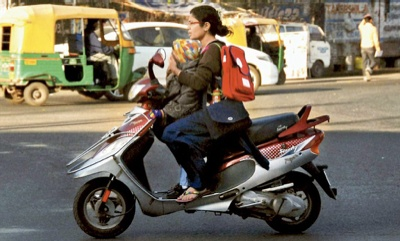

In [11]:
from IPython.display import Image, display
import os
#model.predict() → rasm yoki videoda ob’ektlarni aniqlaydi
#conf=0.5 → faqat 50% dan yuqori ishonch bilan aniqlangan obyektlarni chiqaradi
#show=False → rasmni avtomatik oynada ko‘rsatmaydi
#save=True → natija rasmni faylga saqlaydi

results = model.predict(source=img_path, conf=0.5, show=False, save=True)

# Natija rasm yo'li
result_img = os.path.join(results[0].save_dir, os.listdir(results[0].save_dir)[0])
display(Image(filename=result_img))


In [22]:
from ultralytics import YOLO
import cv2

# Model
model = YOLO(r"C:\Users\bahti\computer_vision\yolo_toliq\runs\detect\helmet_train\weights\best.pt")

# Input / Output
input_video_path = r"C:\Users\bahti\computer_vision\5-modul\6-kun\dataset\videos\helmet_video.mp4"
output_video_path = r"C:\Users\bahti\computer_vision\yolo_toliq\runs\detect\helmet_video_output.mp4"

# VideoCapture
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    raise Exception(f"Video topilmadi: {input_video_path}")

# Video yozish parametrlari
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #Videoning frame eni (pixel)   Masalan, 1920 px
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  #Videoning frame bo‘yi (pixel)   Masalan, 1080 px
fps = cap.get(cv2.CAP_PROP_FPS)          #Video frame per second (fps)    Masalan, 30 → 1 sekundda 30 frame

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

"""cap.read() → video fayldan bitta frame oladi

ret → frame muvaffaqiyatli olingan yoki yo‘qligini bildiradi (True/False)

frame → olingan video frame (rasm)

Agar frame qolmasa → sikl tugaydi (break)

📌 Shu bilan video oxirigacha frame’lar o‘qiladi"""

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Modelni rasmga qo'llaymiz
    results = model.predict(source=frame, conf=0.5, verbose=False)
    annotated_frame = results[0].plot()  # bounding box bilan

    # Frame-ni video faylga yozamiz
    out.write(annotated_frame)

cap.release()
out.release()

print(f"✅ Video ishlatildi va natija saqlandi: {output_video_path}")


✅ Video ishlatildi va natija saqlandi: C:\Users\bahti\computer_vision\yolo_toliq\runs\detect\helmet_video_output.mp4
